In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

#Analysis
from Analysis.data_inspection import  DataInspectionFactory, DataInfo, DescriptiveStatistics ,SummaryStatistics
from Analysis.missing_value_analysis import MissingValueAnalysisFactory, MissingValuesNumber, MissingValuesCategory
from Analysis.data_preparation import PreparationFactory, Preparation
from Analysis.univariate_analysis import UnivariateAnalysisFactory, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from Analysis.bivariate_analysis import BivariateAnalysisFactory, ScatterplotAnalysis, LineplotAnalysis, HistogramAnalysis, BoxplotAnalysis, BarplotAnalysis
from Analysis.multivariate_analysis import MultivariateAnalysisFactory, CorrelationHeatmap, DataAggregation
from Analysis.medical_condition import MedConVisualizationFactory, WordCloud, MedicalCondition, Cancer, Arthritis, Diabetes, Hypertension, Obesity, Asthma

#Preprocessing
from Preprocessing.encoding import EncodingFactory, OrdinalEncode, LabelEncode
from Preprocessing.selection import SelectionFactory, FeatSelect
from Preprocessing.scaling import ScalingFactory, FeatScale
from Preprocessing.splitting import TrainTestSplitFactory, TrainTestSplit

#Model
from Model.model import ModelFactory, RFC
from Model.prediction import ModelPredictorFactory, ModelPredictor
from Model.evaluation import EvaluateFactory, ConfusionMatrixEvaluator, AccuracyEvaluator

In [3]:
data = pd.read_csv(r"Health Care Dataset\healthcare_data.csv")

### **Data Inspection**

In [4]:
summarize = DataInspectionFactory(SummaryStatistics())
summarize.data_inspection_execute(data)

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25541.259324    301.134829
std       19.602454    14207.961646    115.243069
min       13.000000        9.238787    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [5]:
info_factory = DataInspectionFactory(DataInfo())
info_factory.data_inspection_execute(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Date of Admission   55500 non-null  object 
 5   Insurance Provider  55500 non-null  object 
 6   Billing Amount      55500 non-null  float64
 7   Room Number         55500 non-null  int64  
 8   Admission Type      55500 non-null  object 
 9   Discharge Date      55500 non-null  object 
 10  Medication          55500 non-null  object 
 11  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.1+ MB


In [6]:
stats_factory = DataInspectionFactory(DescriptiveStatistics())
stats_factory.data_inspection_execute(data)

,Sample Count,Missing Values,Number of Unique,Unique (%),mean,std,min,25%,50%,75%,max
Age,55500,0,77,0.138739,51.539459,19.602454,13.000000,35.000000,52.000000,68.000000,89.000000
Billing Amount,55500,0,50000,90.090090,25541.259324,14207.961646,9.238787,13241.224652,25538.069376,37820.508436,52764.276736
Room Number,55500,0,400,0.720721,301.134829,115.243069,101.000000,202.000000,302.000000,401.000000,500.000000


### **Missing Value Check**

In [7]:
miss_value_factory = MissingValueAnalysisFactory(MissingValuesNumber())
miss_value_factory.missing_value_analysis_execute(data)

There's no missing value in numerical data.


,Age,Billing Amount,Room Number
0,30,18856.281306,328
1,62,33643.327287,265
2,76,27955.096079,205
3,28,37909.782410,450
4,43,14238.317814,458
...,...,...,...
55495,42,2650.714952,417
55496,61,31457.797307,316
55497,38,27620.764717,347
55498,43,32451.092358,321


In [8]:
miss_value_factory = MissingValueAnalysisFactory(MissingValuesCategory())
miss_value_factory.missing_value_analysis_execute(data)

There's no missing value in categorical data.


,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
0,Male,B-,Cancer,2024-01-31,Blue Cross,Urgent,2024-02-02,Paracetamol,Normal
1,Male,A+,Obesity,2019-08-20,Medicare,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Female,A-,Obesity,2022-09-22,Aetna,Emergency,2022-10-07,Aspirin,Normal
3,Female,O+,Diabetes,2020-11-18,Medicare,Elective,2020-12-18,Ibuprofen,Abnormal
4,Female,AB+,Cancer,2022-09-19,Aetna,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...
55495,Female,O+,Asthma,2020-08-16,Blue Cross,Elective,2020-09-15,Penicillin,Abnormal
55496,Female,AB-,Obesity,2020-01-23,Cigna,Elective,2020-02-01,Aspirin,Normal
55497,Female,B+,Hypertension,2020-07-13,UnitedHealthcare,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Male,O-,Arthritis,2019-05-25,Medicare,Elective,2019-05-31,Ibuprofen,Abnormal


### **Data Preparation**

In [9]:
admission_discharge = PreparationFactory(Preparation())
admission_discharge.prepare(data)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group,Length of Stay,Billing Category
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Young Adults,2,Very High
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Seniors,6,Very High
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Seniors,15,Very High
3,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Young Adults,30,Very High
4,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Middle-aged Adults,20,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,Middle-aged Adults,30,Medium
55496,61,Female,AB-,Obesity,2020-01-23,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,Seniors,9,Very High
55497,38,Female,B+,Hypertension,2020-07-13,Unitedhealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,Young Adults,28,Very High
55498,43,Male,O-,Arthritis,2019-05-25,Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,Middle-aged Adults,6,Very High


### **Univariate Analysis**

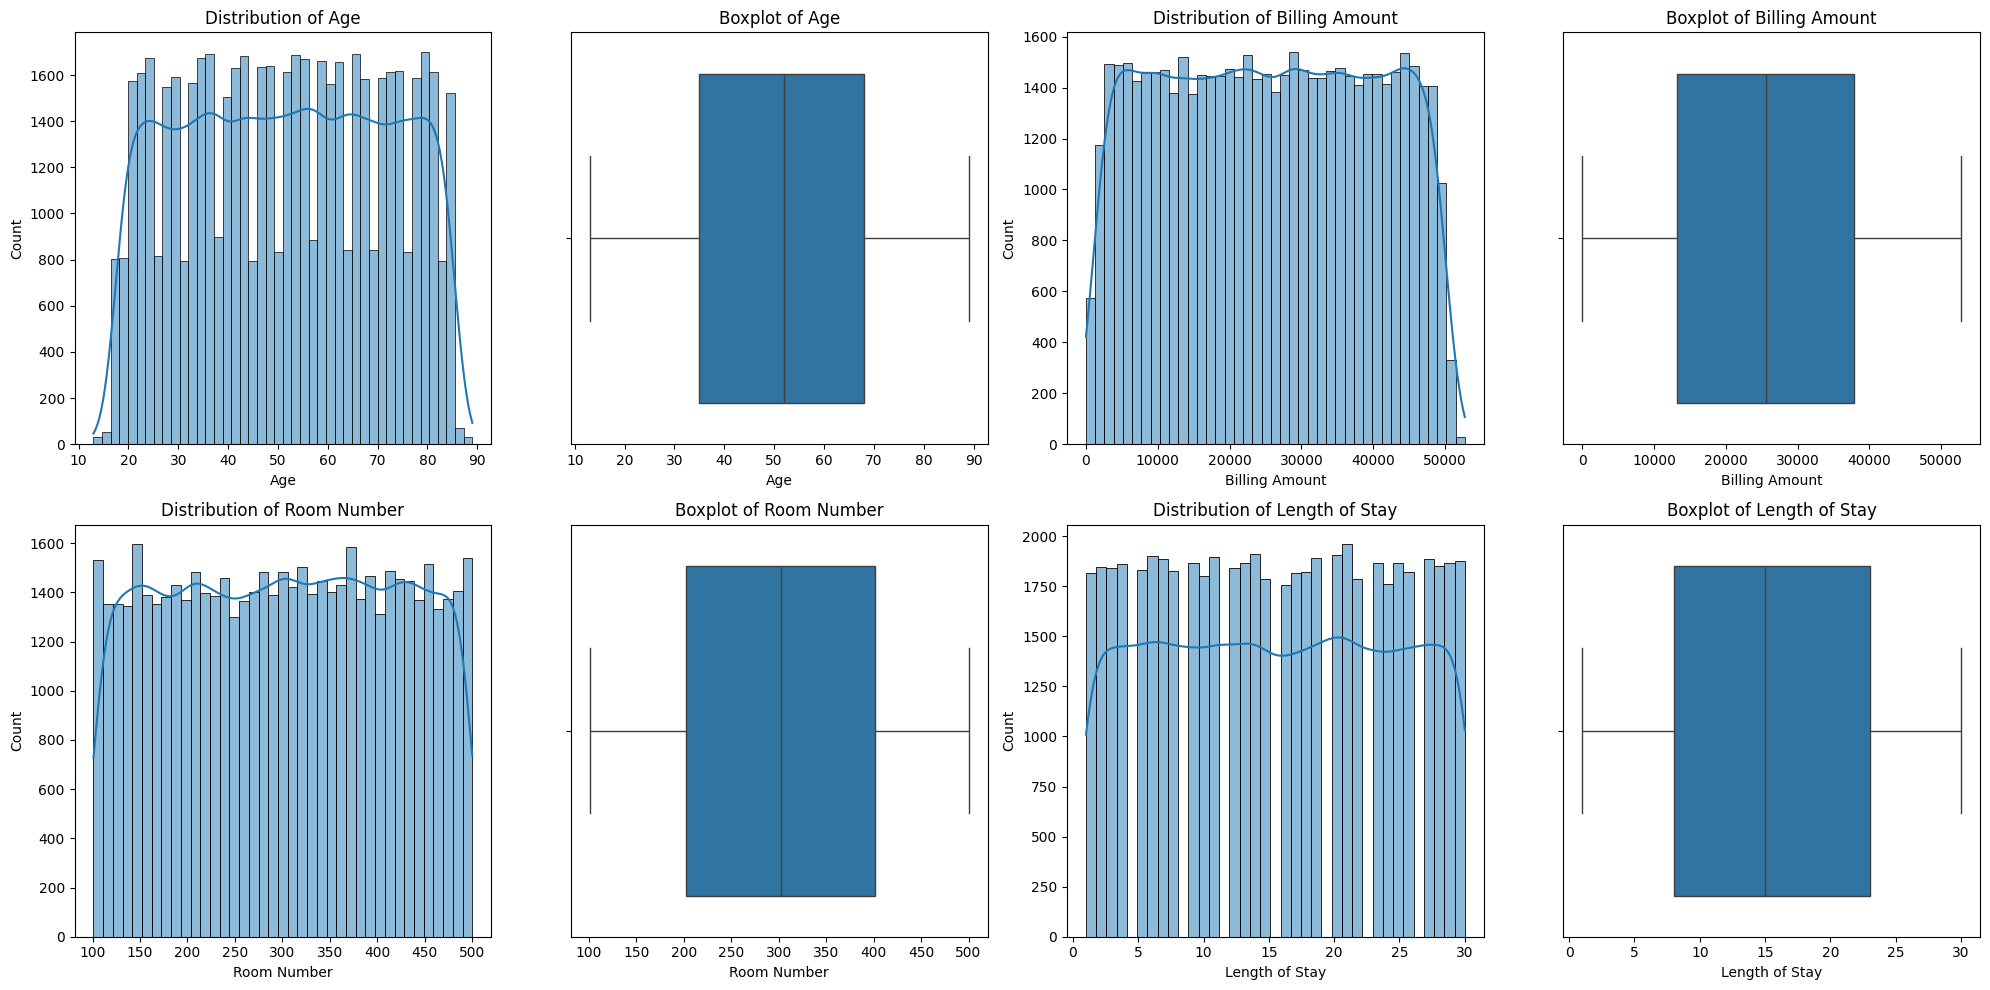

In [10]:
univariate = UnivariateAnalysisFactory(NumericalUnivariateAnalysis())
univariate.analyze(data)

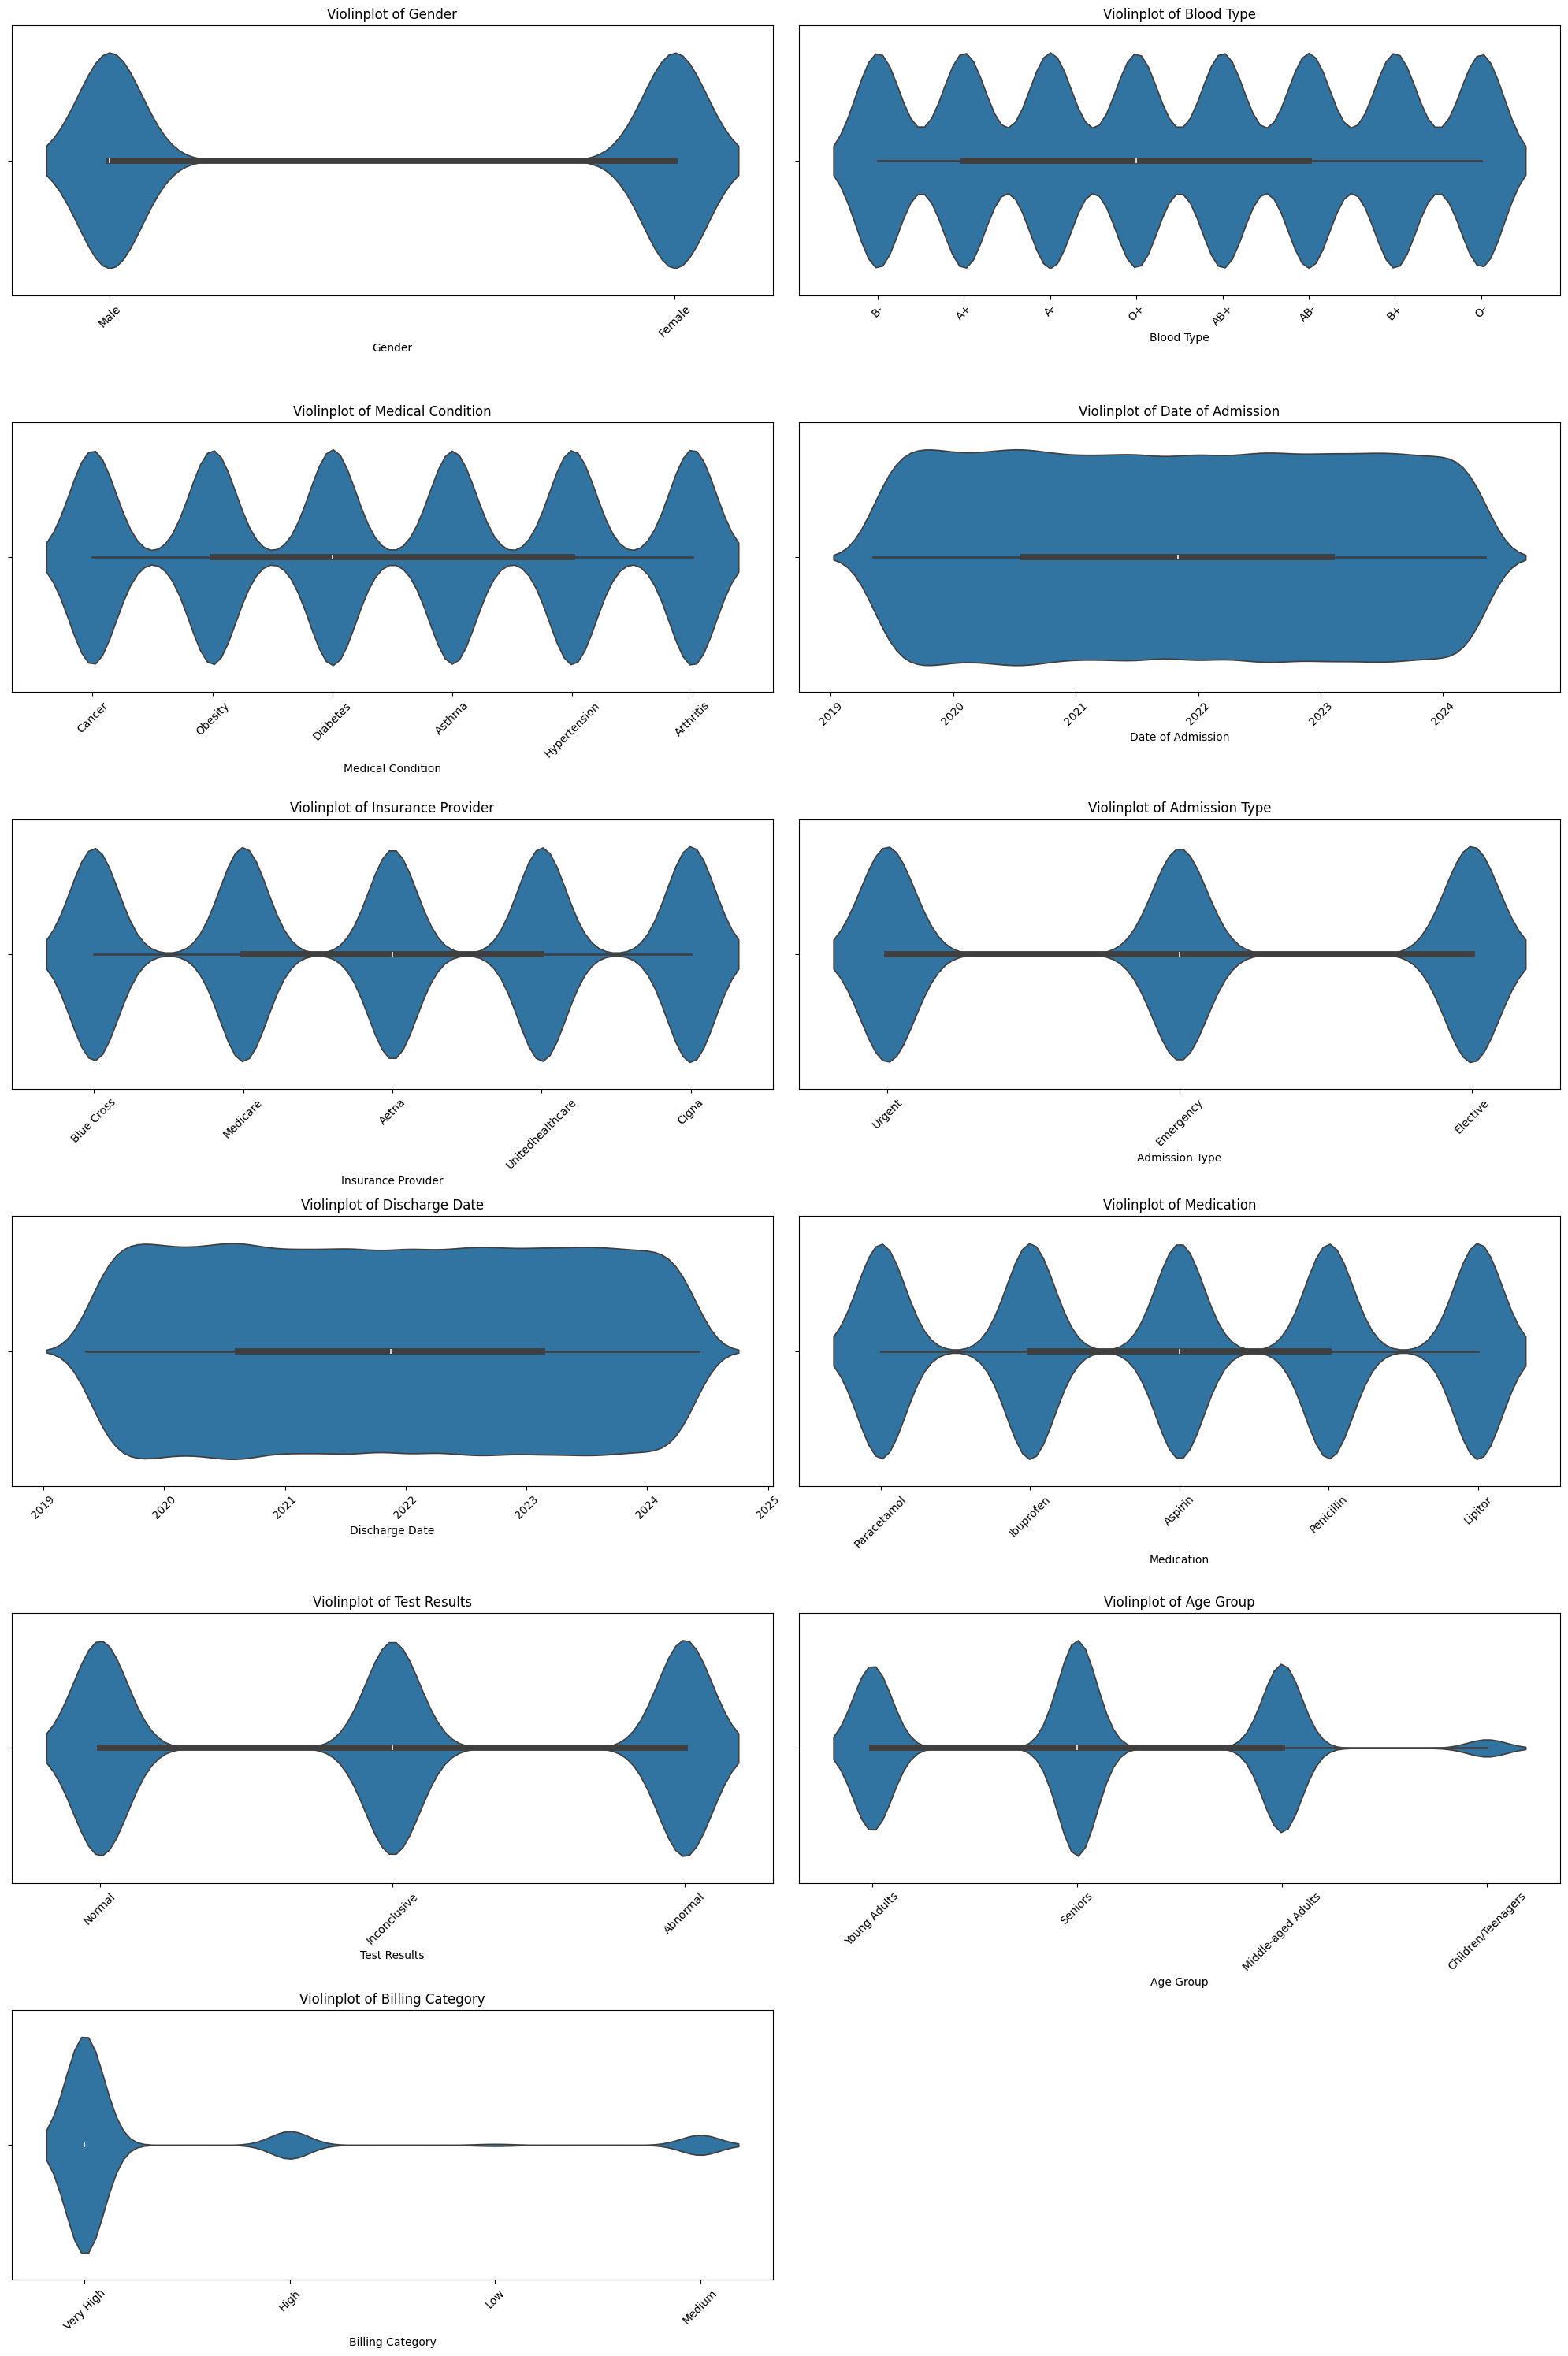

In [11]:
univariate = UnivariateAnalysisFactory(CategoricalUnivariateAnalysis())
univariate.analyze(data)

### **Bivariate Analysis**

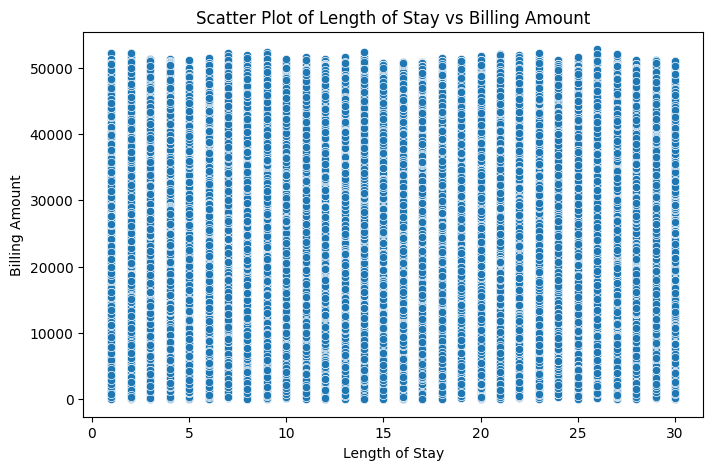

In [12]:
bivariate = BivariateAnalysisFactory(ScatterplotAnalysis())
bivariate.analyze(data, 'Length of Stay', 'Billing Amount')

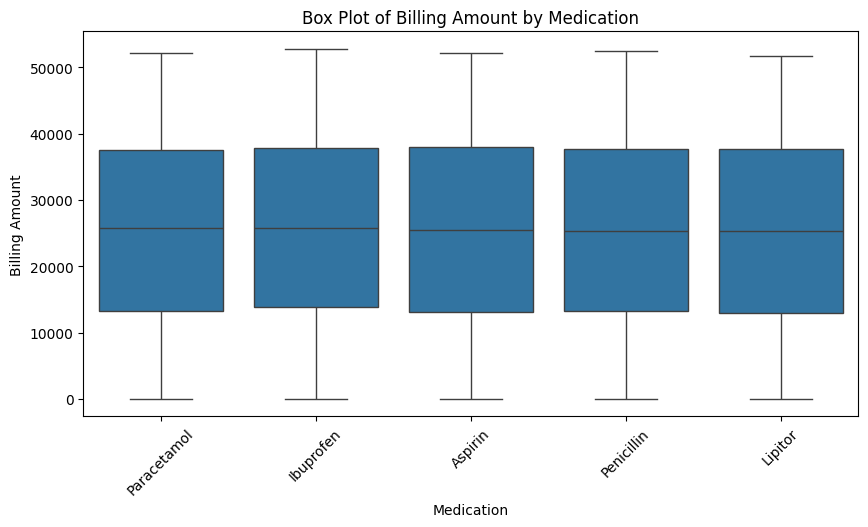

In [13]:
bivariate = BivariateAnalysisFactory(BoxplotAnalysis())
bivariate.analyze(data, 'Medication', 'Billing Amount')

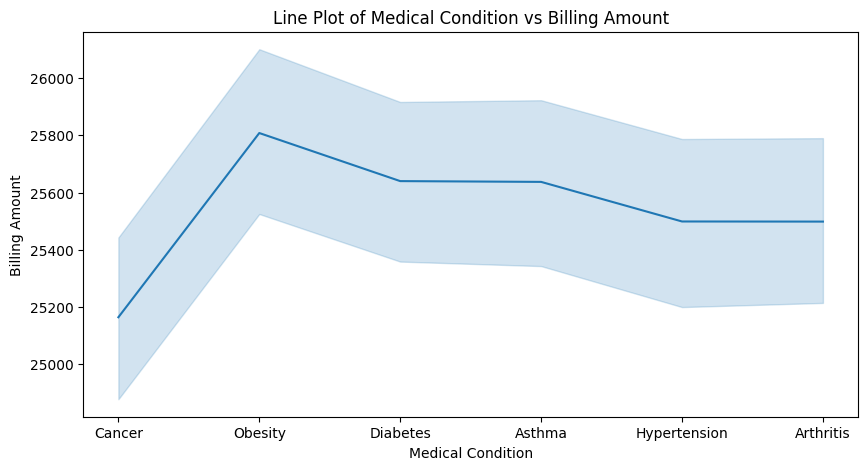

In [14]:
bivariate = BivariateAnalysisFactory(LineplotAnalysis())
bivariate.analyze(data, 'Medical Condition', 'Billing Amount')

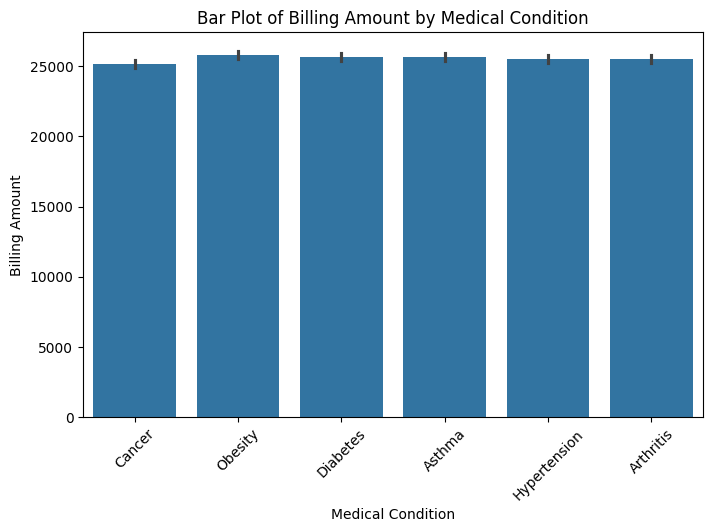

In [15]:
bivariate = BivariateAnalysisFactory(BarplotAnalysis())
bivariate.analyze(data, 'Medical Condition', 'Billing Amount')

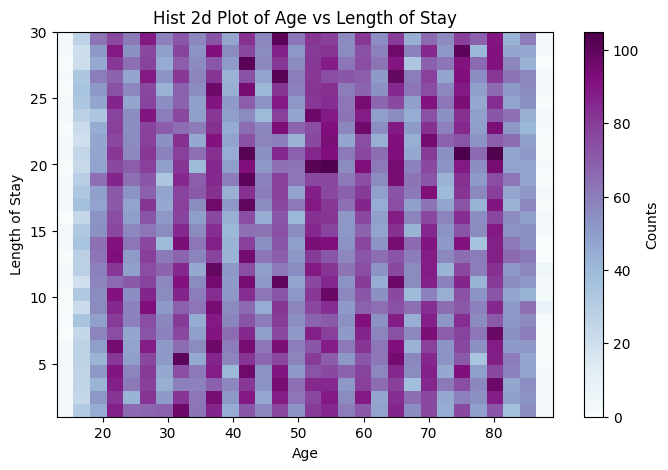

In [16]:
bivariate = BivariateAnalysisFactory(HistogramAnalysis())
bivariate.analyze(data, 'Age', 'Length of Stay')

### **Multivariate Analysis**

In [17]:
# Create an instance of the MultivariateAnalysisFactory with DataAggregation as the strategy
dataag = MultivariateAnalysisFactory(DataAggregation())

# Perform analysis on the provided dataset using the current strategy (DataAggregation)
dataag.analyze(data)

# Store the current aggregation strategy being used for further access or manipulation
aggregator = dataag.strategy

In [18]:
print("Top Billing by Age, Medical Condition, Gender:")
aggregator.top_billing_by_age_medical_gender()

Top Billing by Age, Medical Condition, Gender:


,Age Group,Medical Condition,Gender,Billing Amount
8,Children/Teenagers,Hypertension,Female,28943.380486
9,Children/Teenagers,Hypertension,Male,27581.510704
1,Children/Teenagers,Arthritis,Male,27498.120990
6,Children/Teenagers,Diabetes,Female,27094.831103
2,Children/Teenagers,Asthma,Female,26616.523761
5,Children/Teenagers,Cancer,Male,26354.461684
31,Seniors,Diabetes,Male,26304.301169
22,Middle-aged Adults,Obesity,Female,26144.921876
39,Young Adults,Asthma,Male,26141.004921
47,Young Adults,Obesity,Male,26074.356154


In [19]:
print("\nMedian Billing by Admission Type and Insurance Provider:")
aggregator.median_billing_by_admission_insurance()


Median Billing by Admission Type and Insurance Provider:


,Admission Type,Insurance Provider,Billing Amount
0,Elective,Aetna,25748.793902
1,Elective,Blue Cross,25562.972615
2,Elective,Cigna,26459.499593
3,Elective,Medicare,25533.815009
4,Elective,Unitedhealthcare,25045.089124
5,Emergency,Aetna,25401.531017
6,Emergency,Blue Cross,25534.248635
7,Emergency,Cigna,24838.277260
8,Emergency,Medicare,25677.064590
9,Emergency,Unitedhealthcare,25670.635403


In [20]:
print("\nPatient Count by Blood Type, Age Group, Gender:")
aggregator.patient_count_by_blood_age_gender()


Patient Count by Blood Type, Age Group, Gender:


,Blood Type,Age Group,Gender,Patient Count
4,A+,Seniors,Female,1397
37,B+,Seniors,Male,1375
29,AB-,Seniors,Male,1368
60,O-,Seniors,Female,1365
45,B-,Seniors,Male,1350
13,A-,Seniors,Male,1338
36,B+,Seniors,Female,1336
12,A-,Seniors,Female,1323
20,AB+,Seniors,Female,1319
28,AB-,Seniors,Female,1313


In [21]:
print("\nMean Billing and Room Number by Age Group and Admission Type:")
aggregator.mean_billing_room_by_age_admission()


Mean Billing and Room Number by Age Group and Admission Type:


,Age Group,Admission Type,Billing Amount,Room Number
0,Children/Teenagers,Elective,26704.170704,304.341772
1,Children/Teenagers,Emergency,26283.159058,301.780446
2,Children/Teenagers,Urgent,25869.862100,300.102334
3,Middle-aged Adults,Elective,25571.361686,300.923201
4,Middle-aged Adults,Emergency,25453.908411,302.054962
5,Middle-aged Adults,Urgent,25445.990595,301.079820
6,Seniors,Elective,25530.030310,302.080950
7,Seniors,Emergency,25511.123367,301.947174
8,Seniors,Urgent,25474.131829,298.671895
9,Young Adults,Elective,25623.340556,300.950676


In [22]:
print("Average Length of Stay by Age Group and Gender:")
aggregator.average_length_of_stay_by_age_gender()

Average Length of Stay by Age Group and Gender:


,Age Group,Gender,Length of Stay
5,Seniors,Male,15.680546
2,Middle-aged Adults,Female,15.604532
0,Children/Teenagers,Female,15.550289
4,Seniors,Female,15.493164
3,Middle-aged Adults,Male,15.480577
7,Young Adults,Male,15.440653
1,Children/Teenagers,Male,15.391304
6,Young Adults,Female,15.315041


In [23]:
print("Top Medications by Medical Condition:")
aggregator.top_medications_by_medical_condition()

Top Medications by Medical Condition:


,Medical Condition,Medication,Count
12,Cancer,Lipitor,1922
0,Arthritis,Aspirin,1918
21,Hypertension,Ibuprofen,1893
17,Diabetes,Lipitor,1893
29,Obesity,Penicillin,1893
8,Asthma,Paracetamol,1888
19,Diabetes,Penicillin,1881
3,Arthritis,Paracetamol,1877
11,Cancer,Ibuprofen,1873
4,Arthritis,Penicillin,1866


In [24]:
print("\nPatient Count by Medical Condition, Age Group, Gender:")
aggregator.patient_count_by_medical_age_gender()


Patient Count by Medical Condition, Age Group, Gender:


,Medical Condition,Age Group,Gender,Patient Count
36,Hypertension,Seniors,Female,1825
21,Cancer,Seniors,Male,1794
28,Diabetes,Seniors,Female,1779
29,Diabetes,Seniors,Male,1776
13,Asthma,Seniors,Male,1773
4,Arthritis,Seniors,Female,1773
12,Asthma,Seniors,Female,1766
5,Arthritis,Seniors,Male,1749
20,Cancer,Seniors,Female,1742
37,Hypertension,Seniors,Male,1730


In [25]:
print("\nAverage Billing by Admission Type, Medical Condition, Gender:")
aggregator.avg_billing_by_admission_medical_gender()


Average Billing by Admission Type, Medical Condition, Gender:


,Admission Type,Medical Condition,Gender,Billing Amount
22,Emergency,Obesity,Female,26390.062109
27,Urgent,Asthma,Male,26364.488237
15,Emergency,Asthma,Male,26315.367111
7,Elective,Diabetes,Male,26310.019923
5,Elective,Cancer,Male,26129.469007
35,Urgent,Obesity,Male,26107.907261
13,Emergency,Arthritis,Male,25956.965299
11,Elective,Obesity,Male,25935.300595
21,Emergency,Hypertension,Male,25766.373414
34,Urgent,Obesity,Female,25744.518923


In [26]:
print("\nMedian Length of Stay by Age Group, Insurance Provider:")
aggregator.median_length_of_stay_by_age_insurance()


Median Length of Stay by Age Group, Insurance Provider:


,Age Group,Insurance Provider,Length of Stay
0,Children/Teenagers,Aetna,16.0
8,Middle-aged Adults,Medicare,16.0
13,Seniors,Medicare,16.0
12,Seniors,Cigna,16.0
11,Seniors,Blue Cross,16.0
9,Middle-aged Adults,Unitedhealthcare,16.0
10,Seniors,Aetna,16.0
5,Middle-aged Adults,Aetna,16.0
4,Children/Teenagers,Unitedhealthcare,16.0
7,Middle-aged Adults,Cigna,15.0


In [27]:
print("\nAverage Billing by Blood Type, Age Group, Gender:")
aggregator.avg_billing_by_blood_age_gender()


Average Billing by Blood Type, Age Group, Gender:


,Blood Type,Age Group,Gender,Billing Amount
40,B-,Children/Teenagers,Female,28235.079527
57,O-,Children/Teenagers,Male,27665.829537
48,O+,Children/Teenagers,Female,27629.929152
41,B-,Children/Teenagers,Male,27593.105675
24,AB-,Children/Teenagers,Female,27098.450358
25,AB-,Children/Teenagers,Male,26806.268379
17,AB+,Children/Teenagers,Male,26678.848783
59,O-,Middle-aged Adults,Male,26340.192158
9,A-,Children/Teenagers,Male,26170.127860
32,B+,Children/Teenagers,Female,26152.349677


In [28]:
print("\nPatient Count by Admission Type, Age Group, Gender:")
aggregator.patient_count_by_admission_age_gender()


Patient Count by Admission Type, Age Group, Gender:


,Admission Type,Age Group,Gender,Patient Count
21,Urgent,Seniors,Male,3585
12,Emergency,Seniors,Female,3578
4,Elective,Seniors,Female,3535
5,Elective,Seniors,Male,3494
20,Urgent,Seniors,Female,3492
13,Emergency,Seniors,Male,3464
19,Urgent,Middle-aged Adults,Male,2857
2,Elective,Middle-aged Adults,Female,2829
3,Elective,Middle-aged Adults,Male,2770
7,Elective,Young Adults,Male,2755


In [29]:
print("\nAverage Billing by Medication, Age Group, Gender:")
aggregator.avg_billing_by_medication_age_gender()


Average Billing by Medication, Age Group, Gender:


,Medication,Age Group,Gender,Billing Amount
16,Lipitor,Children/Teenagers,Female,27899.187151
17,Lipitor,Children/Teenagers,Male,27398.513901
0,Aspirin,Children/Teenagers,Female,27001.978610
32,Penicillin,Children/Teenagers,Female,26928.462728
25,Paracetamol,Children/Teenagers,Male,26912.377467
33,Penicillin,Children/Teenagers,Male,26670.805774
9,Ibuprofen,Children/Teenagers,Male,26470.341102
13,Ibuprofen,Seniors,Male,26166.627972
10,Ibuprofen,Middle-aged Adults,Female,26122.876021
6,Aspirin,Young Adults,Female,26086.619789


In [30]:
print("\nAverage Length of Stay by Admission Type, Age Group, Gender:")
aggregator.avg_length_of_stay_by_admission_age_gender()


Average Length of Stay by Admission Type, Age Group, Gender:


,Admission Type,Age Group,Gender,Length of Stay
8,Emergency,Children/Teenagers,Female,16.0
5,Elective,Seniors,Male,16.0
10,Emergency,Middle-aged Adults,Female,16.0
3,Elective,Middle-aged Adults,Male,16.0
0,Elective,Children/Teenagers,Female,16.0
12,Emergency,Seniors,Female,16.0
9,Emergency,Children/Teenagers,Male,16.0
20,Urgent,Seniors,Female,16.0
11,Emergency,Middle-aged Adults,Male,16.0
15,Emergency,Young Adults,Male,16.0


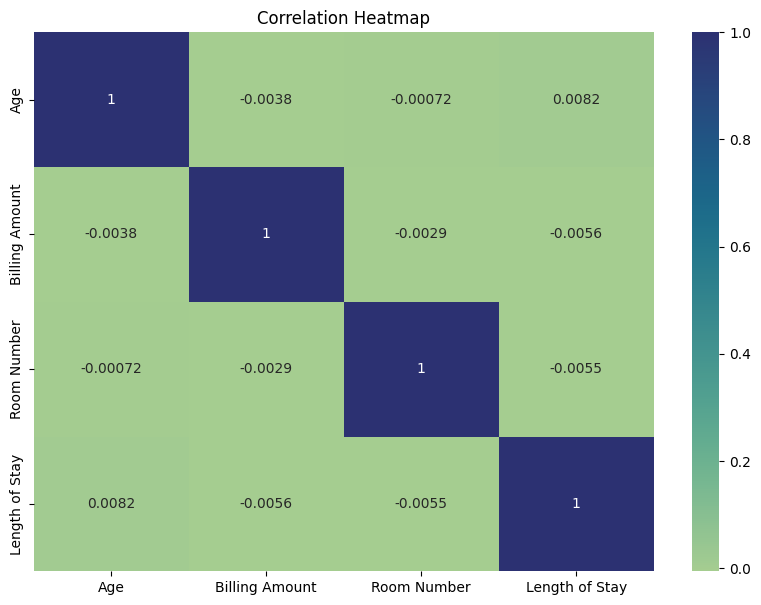

In [31]:
multivariate = MultivariateAnalysisFactory(CorrelationHeatmap())
multivariate.analyze(data)

### **Medical Condition Analysis**

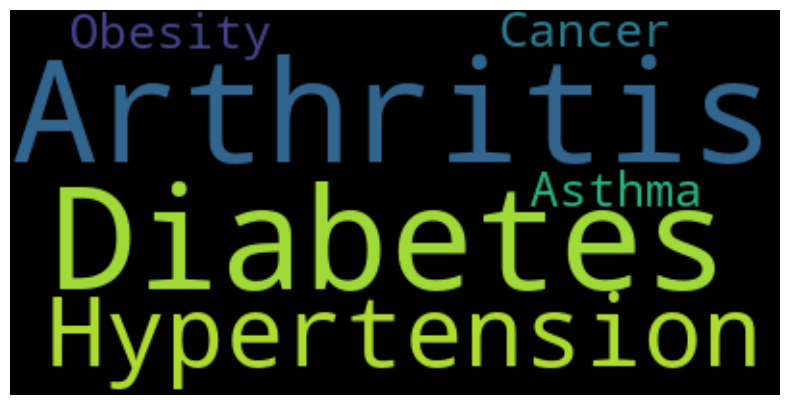

In [32]:
med_con = MedConVisualizationFactory(WordCloud())
med_con.analyze(data)

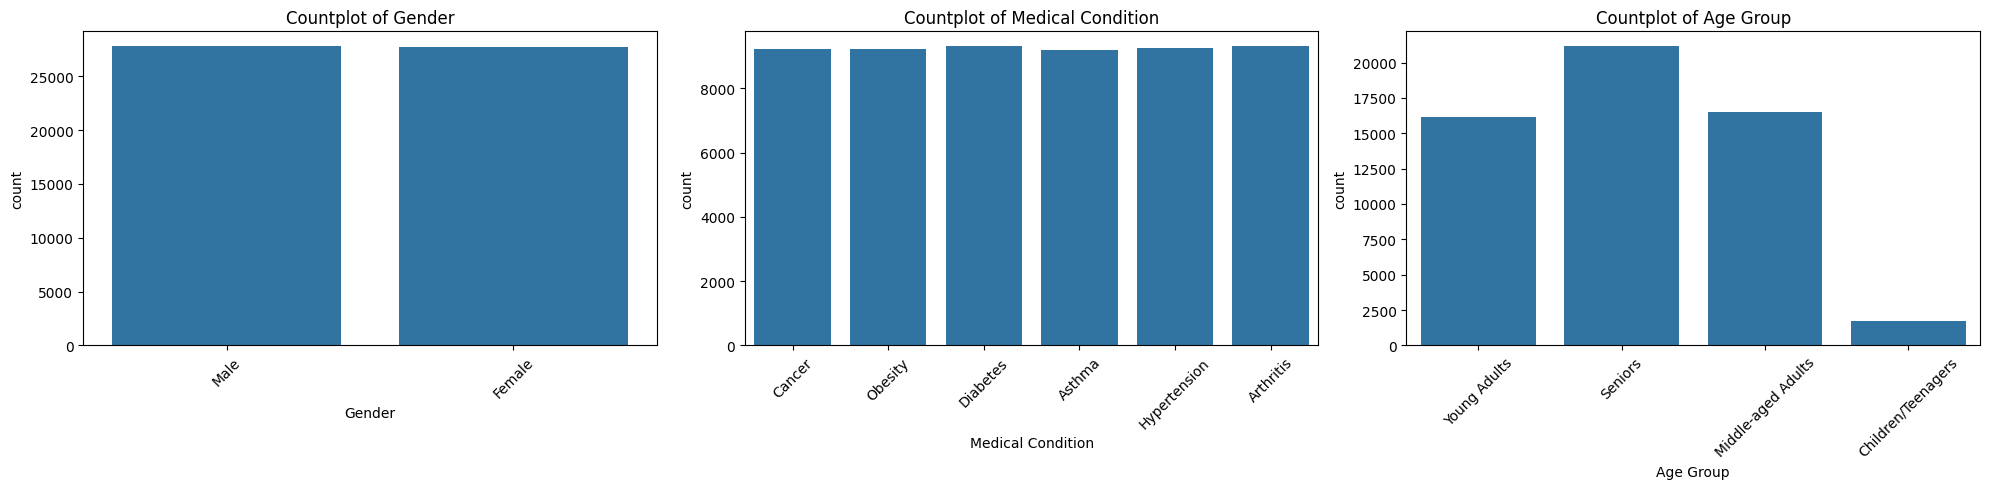

In [33]:
med_con = MedConVisualizationFactory(MedicalCondition())
med_con.analyze(data)

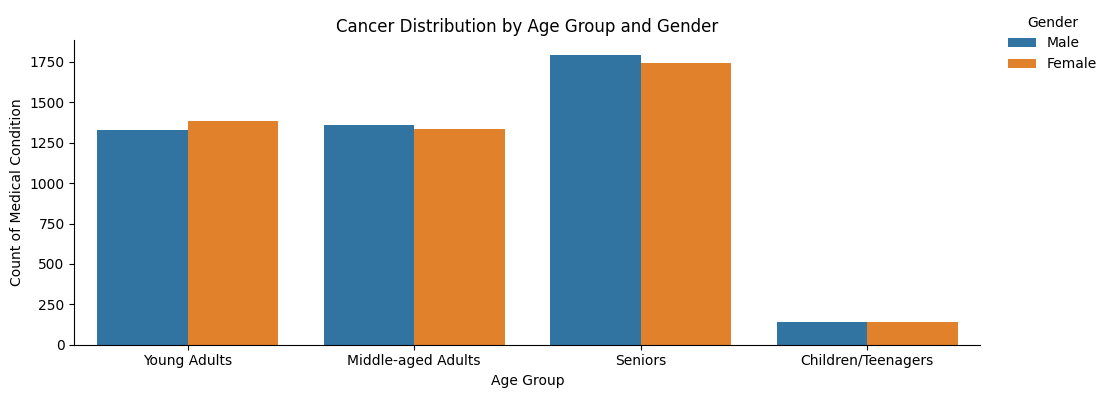

In [34]:
med_con = MedConVisualizationFactory(Cancer())
med_con.analyze(data)

## **Cancer Distribution by Age Group and Gender**

The provided chart highlights variations in cancer incidence across different age groups and genders. Below is a deeper exploration into the potential reasons behind the observed patterns:

### 1. **High Cancer Incidence in Seniors**
   - **Why?**
     - Cancer typically affects older adults more frequently as it is a disease of aging. Over the years, the body accumulates genetic mutations due to environmental factors such as radiation and chemicals, compounded by lifestyle habits like smoking or poor dietary choices.
     - The immune system weakens with age, reducing its effectiveness in identifying and destroying abnormal cells, thus increasing cancer susceptibility.

### 2. **Steady Cancer Rates in Young and Middle-aged Adults**
   - **Why?**
     - Although lower than in seniors, the risk in these age groups is elevated due to the beginning manifestations of cumulative carcinogen exposure.
     - The body's mechanisms for DNA repair are still effective but are starting to face the challenges from lifestyle-linked cancers (e.g., lung cancer from smoking, skin cancer from UV exposure).

### 3. **Low Cancer Incidence in Children/Teenagers**
   - **Why?**
     - This age group shows the least cancer incidence as they have less time to accumulate significant DNA damage from environmental exposure.
     - Most cancers in children, such as leukemia or neuroblastoma, are often linked to genetic and developmental issues rather than environmental or lifestyle factors.

### 4. **Gender Differences**
   - **Why?**
     - The slight difference in cancer incidence between males and females in seniors could be influenced by gender-specific cancers (e.g., prostate in males, breast in females).
     - Overall, the gender gap in cancer rates across all age groups is minimal, indicating relatively equal exposure to common risk factors.

---

**Conclusion:**
Cancer incidence increases with age due to accumulated environmental and lifestyle risk factors, alongside a decline in immune and DNA repair efficiencies. Children have the lowest rates due to limited exposure and the predominance of genetic factors in their cancer types. Gender differences are minor, reflecting similar lifestyle and environmental exposures in modern societies.

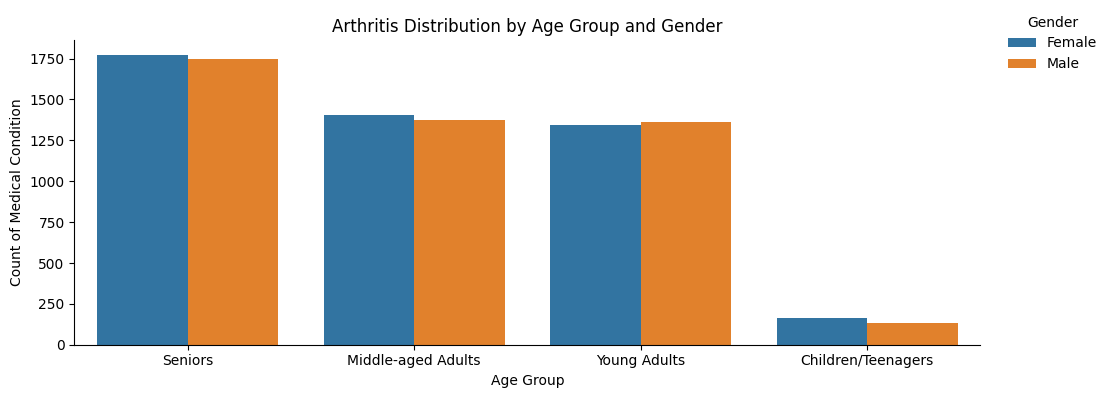

In [35]:
med_con = MedConVisualizationFactory(Arthritis())
med_con.analyze(data)

## **Arthritis Distribution by Age Group and Gender**

The chart illustrates the distribution of arthritis cases across different age groups and genders. Below is a detailed explanation of the observed patterns:

### 1. **High Arthritis Incidence in Seniors**
   - **Why?**
     - Arthritis is more prevalent in seniors due to the natural wear and tear on joints as people age. Osteoarthritis, the most common form, develops as the cartilage between joints gradually deteriorates, leading to inflammation, pain, and stiffness.
     - Seniors tend to experience more chronic conditions, and arthritis is a common consequence of aging joints and decreased mobility.

### 2. **Arthritis Incidence in Middle-aged and Young Adults**
   - **Why?**
     - Middle-aged adults also experience a significant number of arthritis cases, often due to lifestyle factors such as repetitive physical activities, previous joint injuries, or weight-related stress on joints.
     - Although less common, arthritis in young adults can be attributed to autoimmune disorders like rheumatoid arthritis, which can develop earlier in life. However, overall rates remain lower compared to older age groups.

### 3. **Low Arthritis Incidence in Children/Teenagers**
   - **Why?**
     - Arthritis in children is rare, and when it occurs, it is typically due to specific conditions like Juvenile Idiopathic Arthritis (JIA), which is an autoimmune disorder. The overall incidence is low since children are generally more physically resilient and have less exposure to the factors that cause joint deterioration.

### 4. **Gender Differences**
   - **Why?**
     - The chart shows very little difference between males and females across all age groups, particularly in seniors. However, females tend to have slightly higher cases, especially as they age, which may be due to hormonal factors that affect bone density and joint health (e.g., the onset of menopause). Additionally, certain types of arthritis, such as rheumatoid arthritis, are more common in women.

---

**Conclusion:**
Arthritis incidence increases significantly with age due to joint degeneration and cumulative wear on the body. Middle-aged adults also experience notable arthritis cases, often due to lifestyle or injury, while younger individuals are less affected. The gender differences are minor, but females show slightly higher rates, possibly influenced by hormonal factors and a higher prevalence of autoimmune conditions.

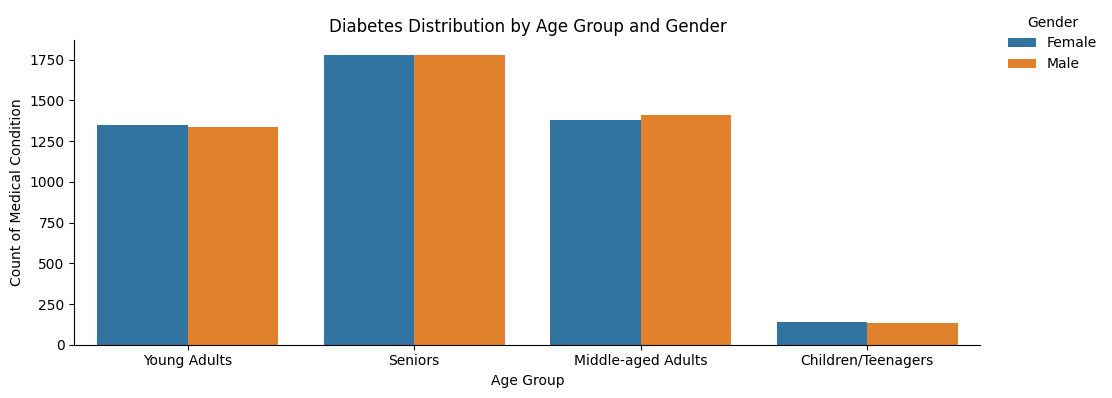

In [36]:
med_con = MedConVisualizationFactory(Diabetes())
med_con.analyze(data)

## **Diabetes Distribution by Age Group and Gender**

The chart displays the distribution of diabetes cases across different age groups and genders. Below is a breakdown of the observed patterns and their possible explanations:

### 1. **High Diabetes Incidence in Seniors**
   - **Why?**
     - Diabetes, particularly Type 2 diabetes, is more common in seniors due to the body's increasing insulin resistance as it ages. Factors such as sedentary lifestyles, obesity, and longer exposure to unhealthy diets compound the risk.
     - With aging, the body's metabolism slows down, leading to higher blood sugar levels, which contribute to the development of diabetes.

### 2. **Steady Diabetes Incidence in Middle-aged and Young Adults**
   - **Why?**
     - Middle-aged adults are at significant risk for diabetes, often due to lifestyle factors such as poor diet, physical inactivity, and obesity. Many develop Type 2 diabetes at this stage due to the long-term impact of these habits.
     - Young adults, although less affected, may experience diabetes either due to early-onset Type 2 diabetes (often linked to obesity and inactivity) or Type 1 diabetes, which is an autoimmune condition and typically presents earlier in life.

### 3. **Low Diabetes Incidence in Children/Teenagers**
   - **Why?**
     - While rare, Type 1 diabetes is the most common form in children and teenagers, resulting from an autoimmune destruction of insulin-producing cells in the pancreas. The overall incidence remains low in this age group as Type 2 diabetes is much less common at younger ages.
     - Children generally have higher metabolic rates and better insulin sensitivity, which lowers the risk of developing diabetes compared to older age groups.

### 4. **Minimal Gender Differences**
   - **Why?**
     - The chart reveals almost identical diabetes incidence rates between males and females across all age groups, indicating that both genders are equally affected by diabetes.
     - However, some studies suggest that men may develop Type 2 diabetes at lower body mass index (BMI) levels than women, while women might have a slightly higher risk of complications such as cardiovascular diseases linked to diabetes.

---

**Conclusion:**
Diabetes is most prevalent in seniors due to the combined effects of aging, lifestyle factors, and prolonged insulin resistance. Middle-aged adults are also highly affected, largely due to obesity and inactivity, while young adults and children face fewer cases, typically from genetic or autoimmune origins. Gender differences in diabetes rates are minimal, reflecting similar exposure to lifestyle and health risks across both males and females.

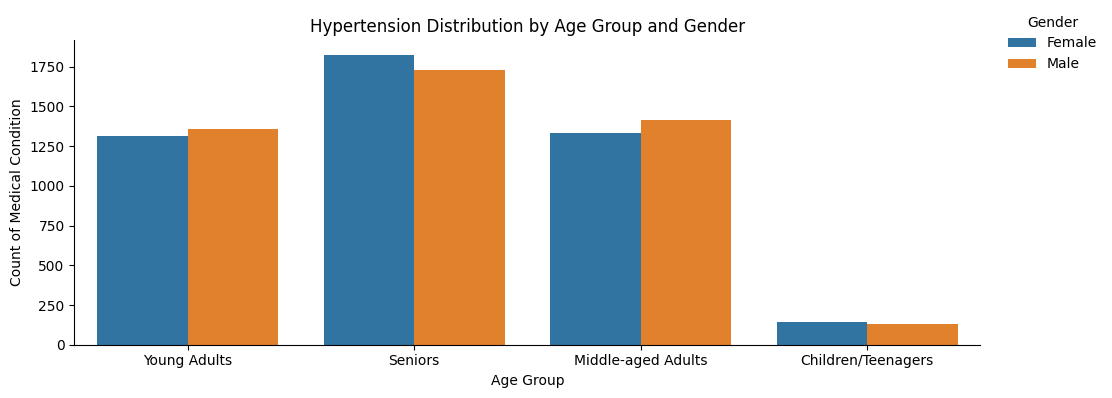

In [37]:
med_con = MedConVisualizationFactory(Hypertension())
med_con.analyze(data)

## **Hypertension Distribution by Age Group and Gender**

The provided chart highlights variations in hypertension prevalence across different age groups and genders. Below is a deeper exploration into the potential reasons behind the observed patterns:

### 1. **High Hypertension Prevalence in Seniors**
   - **Why?**
     - Hypertension is more common in older adults due to the natural aging process, which includes stiffening of the arteries and blood vessels, leading to increased blood pressure.
     - Age-related lifestyle factors, such as poor dietary habits, reduced physical activity, and the cumulative effect of stress, further contribute to high blood pressure in seniors.
     - Seniors often face additional health conditions that may exacerbate hypertension, such as diabetes and kidney disease.

### 2. **Gradual Increase in Hypertension in Young Adults and Middle-aged Adults**
   - **Why?**
     - Young adults and Middle-aged adults begin experiencing the early effects of hypertension as their cardiovascular system starts to weaken. This is compounded by lifestyle factors such as unhealthy diets, lack of exercise, stress, and excessive alcohol or salt consumption.
     - The onset of weight gain and obesity in these age groups is also a key factor in the rising incidence of hypertension.

### 3. **Low Hypertension Prevalence in Teenagers**
   - **Why?**
     - teenagers generally have lower hypertension rates because their arteries are still flexible, and their cardiovascular system is typically healthier.
     - However, the risk of developing hypertension is rising even among younger populations due to increasing obesity rates, high sodium diets, and stress from modern lifestyles.

### 4. **Gender Differences**
   - **Why?**
     - In younger and middle-aged adults, hypertension tends to be more common in men due to lifestyle factors such as higher rates of alcohol consumption, smoking, and stress.
     - In seniors, the gap between males and females narrows or even reverses, with postmenopausal women experiencing a rise in hypertension due to hormonal changes and other risk factors.

---

**Conclusion:**
Hypertension prevalence increases with age as a result of cardiovascular aging, lifestyle choices, and related health conditions. Teenagers are less affected due to better cardiovascular health, though rising lifestyle risk factors pose future challenges.

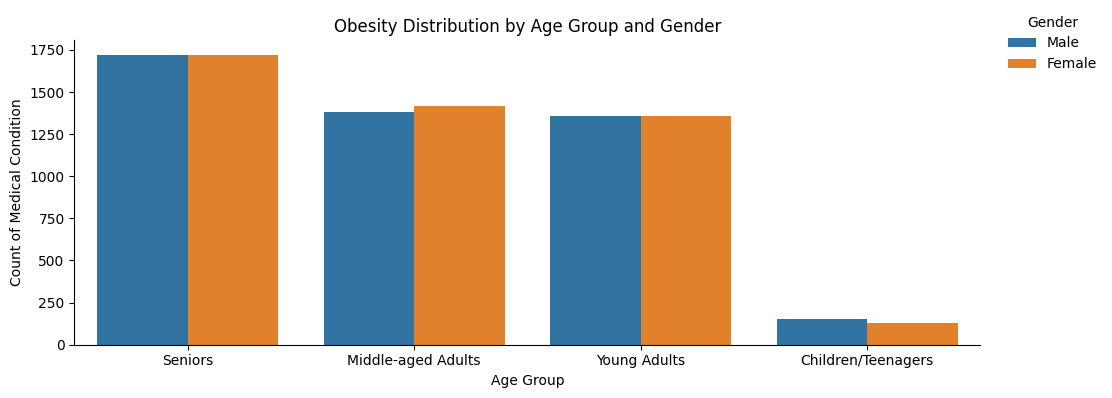

In [38]:
med_con = MedConVisualizationFactory(Obesity())
med_con.analyze(data)

## **Obesity Distribution by Age Group and Gender**

The provided chart highlights variations in obesity prevalence across different age groups and genders. Below is a deeper exploration into the potential reasons behind the observed patterns:

### 1. **High Obesity Prevalence in Seniors**
   - **Why?**
     - Obesity is particularly prevalent in seniors due to factors such as a slowing metabolism, decreased physical activity, and the accumulation of poor dietary habits over the years.
     - Hormonal changes, especially during menopause in women, contribute to weight gain as the body's ability to regulate fat storage and energy expenditure diminishes.
     - Seniors may face additional challenges, such as reduced mobility and health conditions that limit exercise, which further contribute to obesity.

### 2. **Obesity Rates in Middle-aged Adults**
   - **Why?**
     - Middle-aged adults experience significant obesity prevalence driven by lifestyle factors such as increased sedentary behavior and unhealthy dietary choices.
     - Stress related to work and family responsibilities can lead to weight gain in this age group.
     - Women in this age group tend to have higher obesity rates compared to men, often influenced by hormonal changes and a decrease in muscle mass that facilitates weight gain.

### 3. **Obesity Rates in Young Adults**
   - **Why?**
     - Young adults are facing rising obesity rates largely due to modern lifestyles characterized by sedentary activities, such as prolonged sitting at desks or using electronic devices, alongside diets high in processed foods and sugars.
     - This age group is also impacted by stress and lack of sleep, which can contribute to unhealthy eating patterns and weight gain.
     - In this group, the obesity rates are relatively similar between men and women.

### 4. **Lower Obesity Rates in Children and Teenagers**
   - **Why?**
     - While children and teenagers generally have lower obesity rates compared to adults, there is an increasing trend due to factors such as high consumption of fast food, sugary beverages, and sedentary activities like video gaming and social media.
     - Reduced physical activity in schools and less participation in outdoor sports also contribute to rising obesity rates in this group.
     - Interestingly, boys often have higher obesity rates than girls in this age group, which can be attributed to lifestyle factors and dietary habits.

### 5. **Gender Differences**
   - **Why?**
     - In the younger age group (children and teenagers), boys tend to have higher obesity rates compared to girls due to lifestyle factors such as higher caloric intake and engagement in sedentary activities.
     - Conversely, women have higher obesity rates in the middle-aged category, influenced by hormonal changes, particularly during and after menopause, which can lead to weight gain.
     - Among seniors and young adults, the obesity rates are relatively similar between men and women.

---

**Conclusion:**
Obesity prevalence is notably high among seniors, with a significant rise in middle-aged women due to lifestyle and hormonal factors. Middle-aged adults face substantial obesity rates, with women showing higher rates compared to men. Young adults exhibit similar rates between genders, while children and teenagers show higher rates in boys than girls. This underscores the need for targeted interventions that address the unique challenges and behaviors across different age and gender groups.

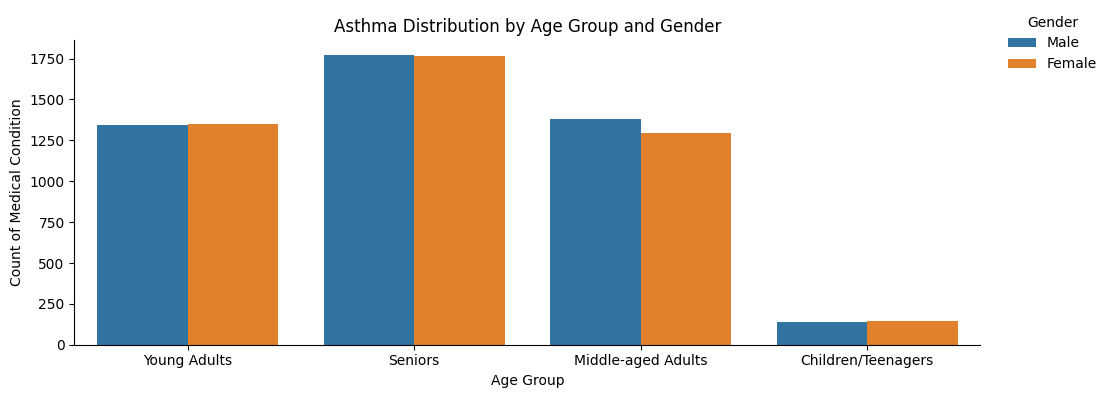

In [39]:
med_con = MedConVisualizationFactory(Asthma())
med_con.analyze(data)

## **Asthma Distribution by Age Group and Gender**

### 1. **Higher Asthma Prevalence in Children and Teenagers**
   - **Why?**
     - Asthma is commonly diagnosed in childhood due to genetic predispositions and environmental triggers like allergens, pollution, and respiratory infections. Children's immune systems are still developing, making them more susceptible to allergic reactions that can trigger asthma.
     - Respiratory system sensitivity to external irritants like pollen, dust, and mold is higher in children, often exacerbated by secondhand smoke or exposure to air pollutants.
     - Over time, some children may outgrow their asthma symptoms, but many continue to have the condition into adulthood.

### 2. **Asthma in Young and Middle-aged Adults**
   - **Why?**
     - Many individuals who develop asthma in childhood continue to experience symptoms as adults, but new cases of asthma can also emerge due to occupational hazards (e.g., exposure to dust, chemicals, or fumes).
     - Increased pollution in urban areas, smoking, or exposure to secondhand smoke can trigger asthma attacks in this age group. Additionally, stress and poor air quality in workplaces or homes may contribute to the development of asthma in adulthood.
     - Some middle-aged adults might experience a worsening of their asthma symptoms due to cumulative environmental exposures.

### 3. **Asthma in Seniors**
   - **Why?**
     - Asthma in seniors can become more challenging to manage due to age-related declines in lung function, making respiratory issues more severe.
     - Some seniors may experience asthma as a secondary condition to chronic obstructive pulmonary disease (COPD) or other respiratory disorders, complicating diagnosis and treatment.
     - The triggers for asthma in seniors can include respiratory infections, certain medications, and long-term exposure to allergens or irritants.

### 4. **Gender Differences**
   - **Why?**
     - In middle-aged adults, males exhibit higher rates of asthma compared to females, potentially linked to occupational exposures or lifestyle factors.

---

**Conclusion:**
Asthma prevalence varies significantly across different age groups and genders. Seniors show higher diagnosis rates due to genetic factors, environmental influences, and age-related declines in lung function. Children and teenagers, while often diagnosed with asthma, have lower prevalence rates compared to other age groups. Young and middle-aged adults frequently continue to experience asthma symptoms from childhood, with new cases emerging from occupational hazards and lifestyle choices. In middle-aged adults, men generally experience higher asthma rates than women, likely due to unique occupational exposures and lifestyle factors. Understanding these trends is crucial for developing targeted interventions and management strategies tailored to the specific needs of each demographic.

### **Preprocessing**

In [40]:
#Feature Encoding

#Ordinal Encoding (for Feature)
prep1 = EncodingFactory(OrdinalEncode())
result_prep1 = prep1.preprocess(data)

#One Hot Encoding (For Label)
prep2 = EncodingFactory(LabelEncode())
result_prep2 = prep2.preprocess(result_prep1)

In [42]:
#Feature Selection
prep3 = SelectionFactory(FeatSelect())
result_prep3 = prep3.feature(result_prep2)

Feature 0: 27.581169
Feature 1: 10103.069599
Feature 2: 35.507956
Feature 3: 3.667347
Feature 4: 1.008303
Feature 5: 0.454308
Feature 6: 0.374319
Feature 7: 6.104467
Feature 8: 0.938025
Selected features: ['Age', 'Billing Amount', 'Room Number', 'Length of Stay', 'Gender', 'Admission Type', 'Medical Condition', 'Insurance Provider', 'Medication']


In [43]:
#Feature Scaling
prep4 = ScalingFactory(FeatScale())
result_prep4 = prep4.feature(result_prep3)

In [44]:
#Split Data
factory = TrainTestSplitFactory(TrainTestSplit())
X_train, X_test, y_train, y_test = factory.splitting(result_prep4)

In [45]:
modeling1 = ModelFactory(RFC())
model_result = modeling1.execute(X_train, y_train)

In [46]:
predict = ModelPredictorFactory(ModelPredictor())
y_pred = predict.run(X_test)

Predictions made.


Confusion Matrix:
[[1683 1033 1038]
 [1052 1558 1007]
 [1133 1001 1595]]
Accuracy: 0.44


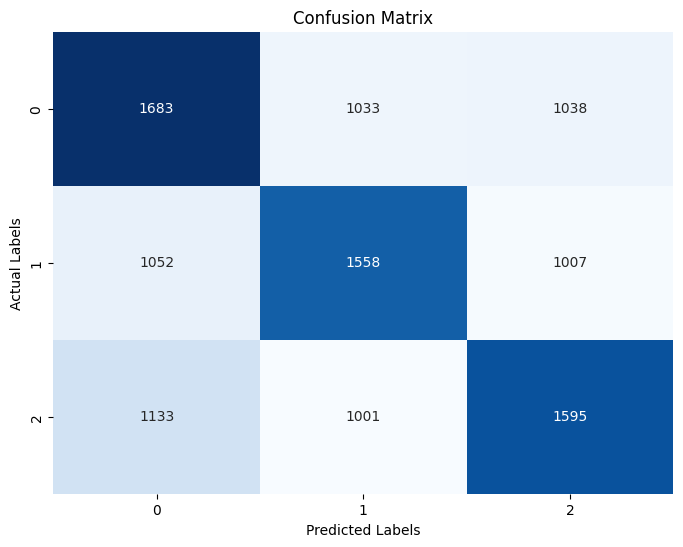

(array([[1683, 1033, 1038],
        [1052, 1558, 1007],
        [1133, 1001, 1595]], dtype=int64),
 0.43567567567567567)

In [47]:
evaluate = EvaluateFactory(ConfusionMatrixEvaluator())
evaluate.evaluate(y_test, y_pred=y_pred)

In [48]:
evaluate = EvaluateFactory(AccuracyEvaluator())
evaluate.evaluate(y_test, y_pred=y_pred)

Precision: 0.44
Recall: 0.44
F1-Score: 0.44


(0.4356972782960471, 0.43567567567567567, 0.4356301480231446)